In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

In [2]:
base_path = '/ssd2/chetanp'

In [3]:
losses = []
for i in range(7):
    path = os.path.join(base_path, f'loss_{i}_2.csv')
    with open(path, 'r') as myfile:
        reader = csv.reader(myfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            losses.append(row)
losses[0] = losses[0][0:100]

In [4]:
losses2 = []
for i in range(7):
    path = os.path.join(base_path, f'loss_{i}_3.csv')
    with open(path, 'r') as myfile:
        reader = csv.reader(myfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            losses2.append(row)

In [5]:
losses = np.array(losses)
losses2 = np.array(losses2)

print(losses.shape)
print(losses2.shape)

loss = np.hstack((losses, losses2))
print(loss.shape)

(7, 100)
(7, 100)
(7, 200)


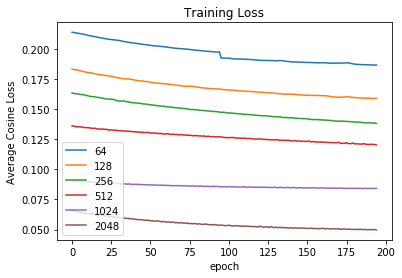

In [6]:
for i in range(6):
    plt.plot(loss[i,5:], label = str(2 ** (i+6)))
plt.legend()
plt.title('Training Loss')
plt.xlabel('epoch')
plt.ylabel('Average Cosine Loss')
plt.show()

In [7]:
path = os.path.join(base_path, f'final_loss_3.csv')
final_losses = []
with open(path, 'r') as myfile:
    reader = csv.reader(myfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        final_losses.append(row)
final_losses.append([5,6,7,8,9,10,11])

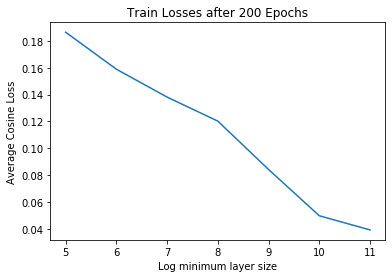

In [8]:
final_losses = np.array(final_losses)

plt.plot(final_losses[1],final_losses[0])
plt.title('Train Losses after 200 Epochs')
plt.xlabel('Log minimum layer size')
plt.ylabel('Average Cosine Loss')
plt.show()

In [9]:
model = LinearRegression()
model.fit(X = final_losses[1,None].T, y = final_losses[0,None].T)
print('Slope : ', np.squeeze(model.coef_))
print('Intercept : ', np.squeeze(model.intercept_))
print('R^2 : ', model.score(X = final_losses[1,None].T, y = final_losses[0,None].T))

Slope :  -0.025500058495838716
Intercept :  0.3149494996712523
R^2 :  0.9876626502845803


In [10]:
path = os.path.join(base_path, 'val_loss_3.csv')
val_losses = []
with open(path, 'r') as myfile:
    reader = csv.reader(myfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        val_losses.append(row)
val_losses.append([5,6,7,8,9,10,11])

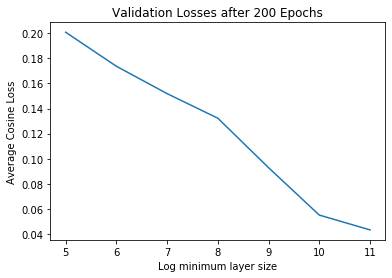

In [11]:
val_losses = np.array(val_losses)

plt.plot(val_losses[2],val_losses[0])
plt.title('Validation Losses after 200 Epochs')
plt.xlabel('Log minimum layer size')
plt.ylabel('Average Cosine Loss')
plt.show()

In [12]:
model = LinearRegression()
model.fit(X = val_losses[2,None].T, y = val_losses[0,None].T)
print('Slope : ', np.squeeze(model.coef_))
print('Intercept : ', np.squeeze(model.intercept_))
print('R^2 : ', model.score(X = val_losses[1,None].T, y = val_losses[0,None].T))

Slope :  -0.027484465567838578
Intercept :  0.34125965348784887
R^2 :  -15.349250042761774


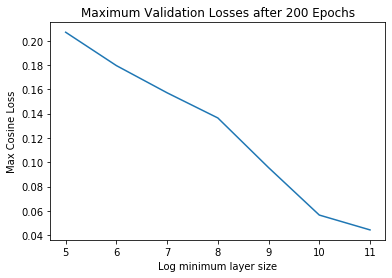

In [13]:
plt.plot(val_losses[2],val_losses[1])
plt.title('Maximum Validation Losses after 200 Epochs')
plt.xlabel('Log minimum layer size')
plt.ylabel('Max Cosine Loss')
plt.show()

In [14]:
print('Train Loss : ', final_losses[0])
print('Test Loss  : ', val_losses[0])
print('Max Test Loss : ', val_losses[1])

Train Loss :  [0.18641225 0.15888549 0.13809427 0.12019717 0.08417609 0.04970962
 0.03916834]
Test Loss  :  [0.20085432 0.17372239 0.15187282 0.13226509 0.09279596 0.0550112
 0.04316572]
Max Test Loss :  [0.2069765  0.17953029 0.15713891 0.13644399 0.09557731 0.05654506
 0.04431983]


In [15]:
path = os.path.join(base_path, 'val_loss_layerwise.csv')

layer_losses = []
with open(path, 'r') as myfile:
    reader = csv.reader(myfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        layer_losses.append(row)

In [18]:
layer_losses = np.array(layer_losses)
layer_avg = layer_losses[0:7]
print(layer_avg.shape)
layer_max = layer_losses[7:]
print(layer_max.shape)

(7, 12)
(7, 12)


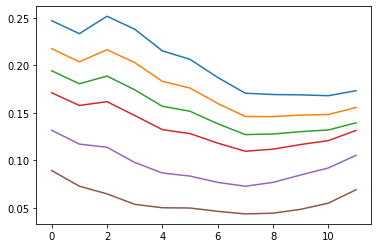

In [20]:
for i in range(6):
    plt.plot(np.flip(layer_avg[i]), label = str(2 ** (i+6)))
plt.show()

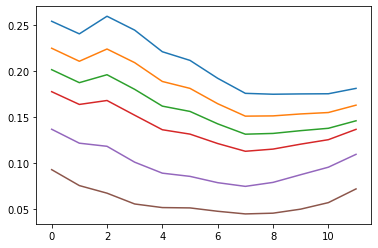

In [21]:
for i in range(6):
    plt.plot(np.flip(layer_max[i]), label = str(2 ** (i+6)))
plt.show()